<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img>

<img src="https://user-images.githubusercontent.com/7065401/98864025-08deda80-2448-11eb-9600-22aa17884cdf.png" style="height: 100%; max-height: inherit; position: absolute; top: 20%; left: 0px;"></img>
<br>

<h2 style="font-weight: bold;">
    Kristin Day
</h2>

<h3 style="color: #ef7d22; margin-top: 0.8em">
    Data Scientist
</h3>
<hr>
<br><br>

<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    yokristinday@gmail.com
</p>
<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    linkedin.com/in/kristin-day-300306a9
</p>

</div>

<br><br><br>

<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h3 style="color: white; position: absolute; top:30%; left:10%;">
    Decision Trees
</h3>
<h1 style="color: white; position: absolute; top:35%; left:10%;">
    Visualizing the Boston Regression Tree
</h1>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:43%; left:10%;">
    Kristin Day
</h3>
</div>

In [ ]:
!pip install dtreeviz

In [8]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd

import dtreeviz
import graphviz
from IPython.display import Image

from sklearn import datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,plot_tree

import warnings
warnings.filterwarnings('ignore')

In [25]:
from dtreeviz.trees import *

In [ ]:
!git clone https://github.com/ine-rmotr-projects/visualizing-the-boston-regression-tree.git

# Pull in your model and data

In [10]:
# Pull in your data
regressor = pickle.load(open('/content/reg_model.pkl','rb'))
X_train = pd.read_csv('/content/visualizing-the-boston-regression-tree/data/boston_X_train.csv')
y_train = pd.read_csv('/content/visualizing-the-boston-regression-tree/data/boston_y_train.csv')['0']

with open('/content/visualizing-the-boston-regression-tree/data/boston_features.txt','r') as f:
    feat_str = f.read()
features = feat_str.split(',')
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# Get some information from your model

In [12]:
# Text representation of the tree using sklearn tree.export_text
tree_rules = tree.export_text(regressor, feature_names=features)
print(tree_rules)

|--- RM <= 6.94
|   |--- LSTAT <= 14.40
|   |   |--- LSTAT <= 5.72
|   |   |   |--- LSTAT <= 4.44
|   |   |   |   |--- value: [35.80]
|   |   |   |--- LSTAT >  4.44
|   |   |   |   |--- RM <= 6.53
|   |   |   |   |   |--- value: [24.65]
|   |   |   |   |--- RM >  6.53
|   |   |   |   |   |--- value: [29.58]
|   |   |--- LSTAT >  5.72
|   |   |   |--- RM <= 6.54
|   |   |   |   |--- LSTAT <= 9.54
|   |   |   |   |   |--- INDUS <= 12.38
|   |   |   |   |   |   |--- RM <= 6.08
|   |   |   |   |   |   |   |--- value: [19.89]
|   |   |   |   |   |   |--- RM >  6.08
|   |   |   |   |   |   |   |--- value: [23.35]
|   |   |   |   |   |--- INDUS >  12.38
|   |   |   |   |   |   |--- value: [27.64]
|   |   |   |   |--- LSTAT >  9.54
|   |   |   |   |   |--- value: [20.86]
|   |   |   |--- RM >  6.54
|   |   |   |   |--- value: [25.99]
|   |--- LSTAT >  14.40
|   |   |--- CRIM <= 6.93
|   |   |   |--- AGE <= 73.30
|   |   |   |   |--- value: [21.22]
|   |   |   |--- AGE >  73.30
|   |   |   |   

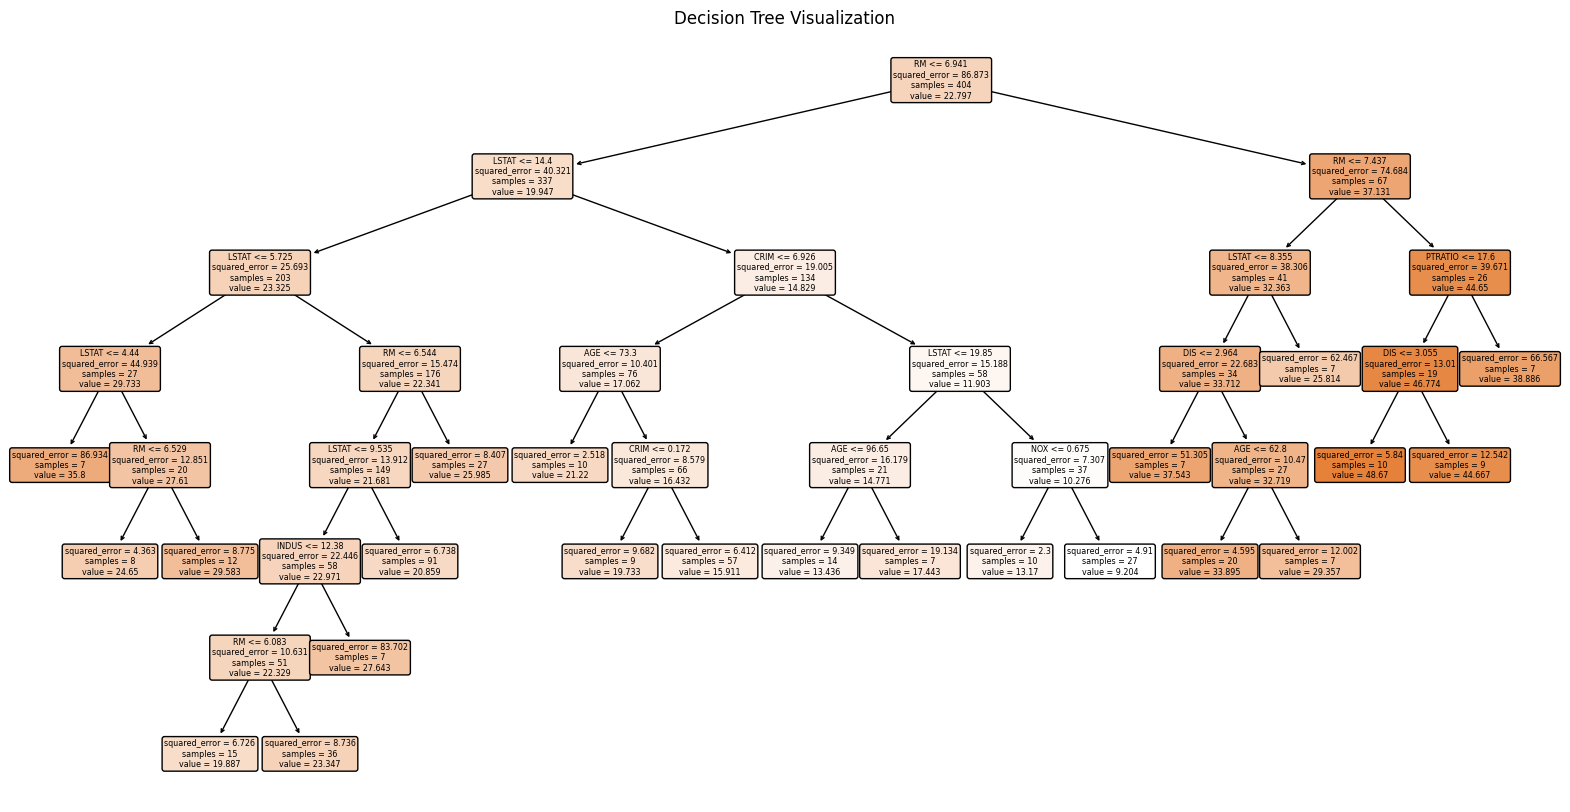

In [15]:
# Plot the tree using sklearn plot_tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=features, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

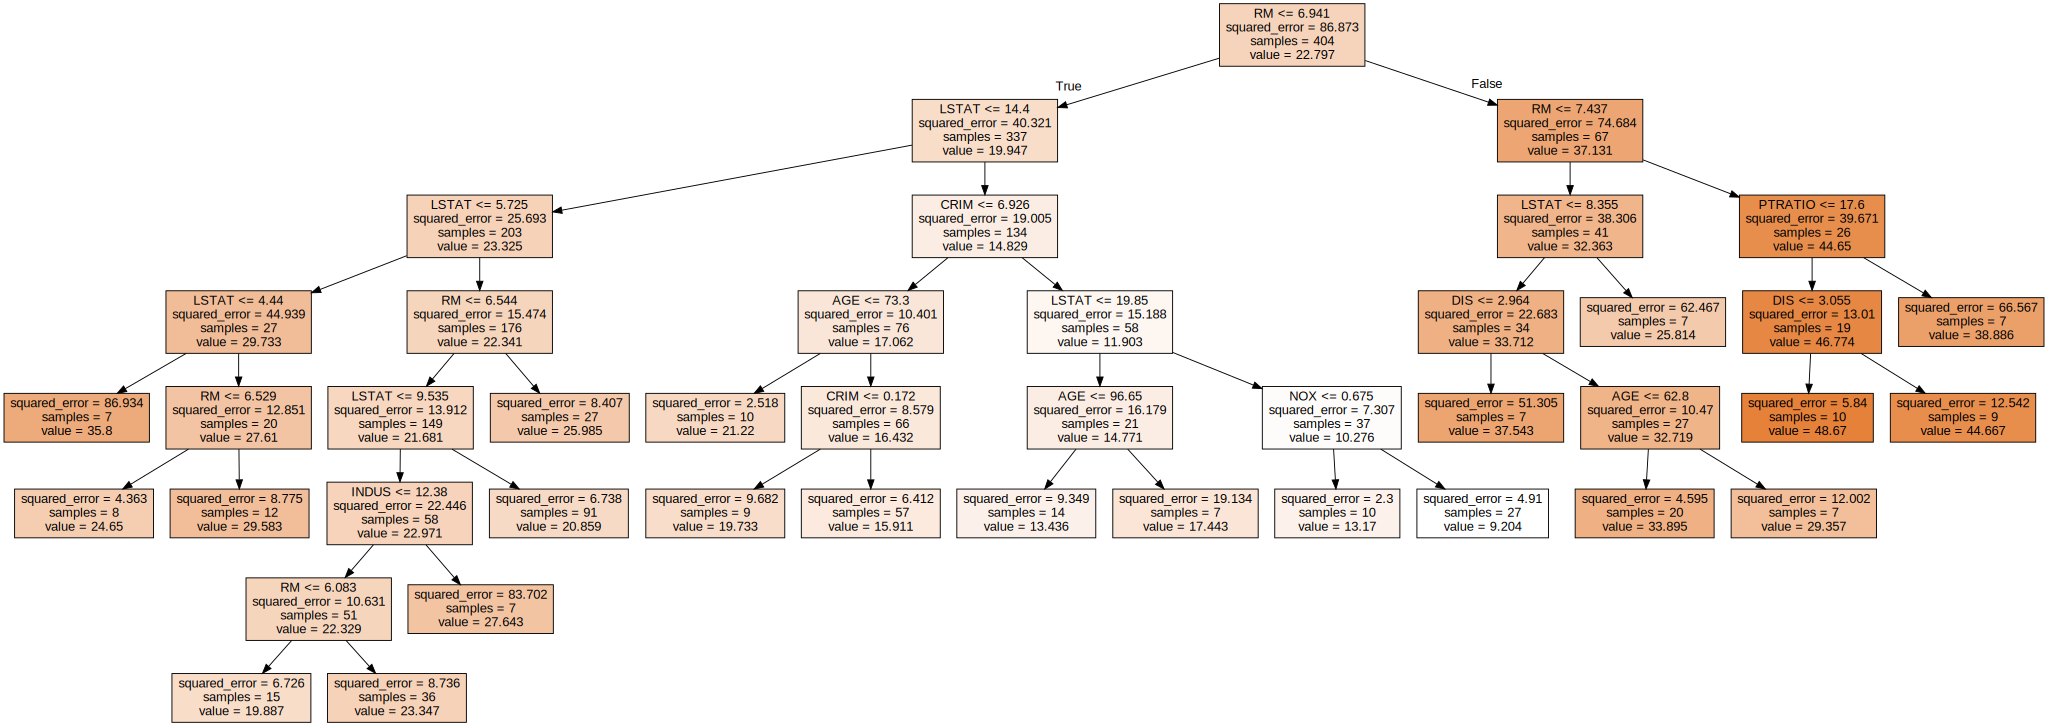

In [17]:
# Visualize the tree using graphviz
dot_data = tree.export_graphviz(regressor,feature_names=features, filled=True,out_file=None)
graphviz.Source(dot_data,format='png')

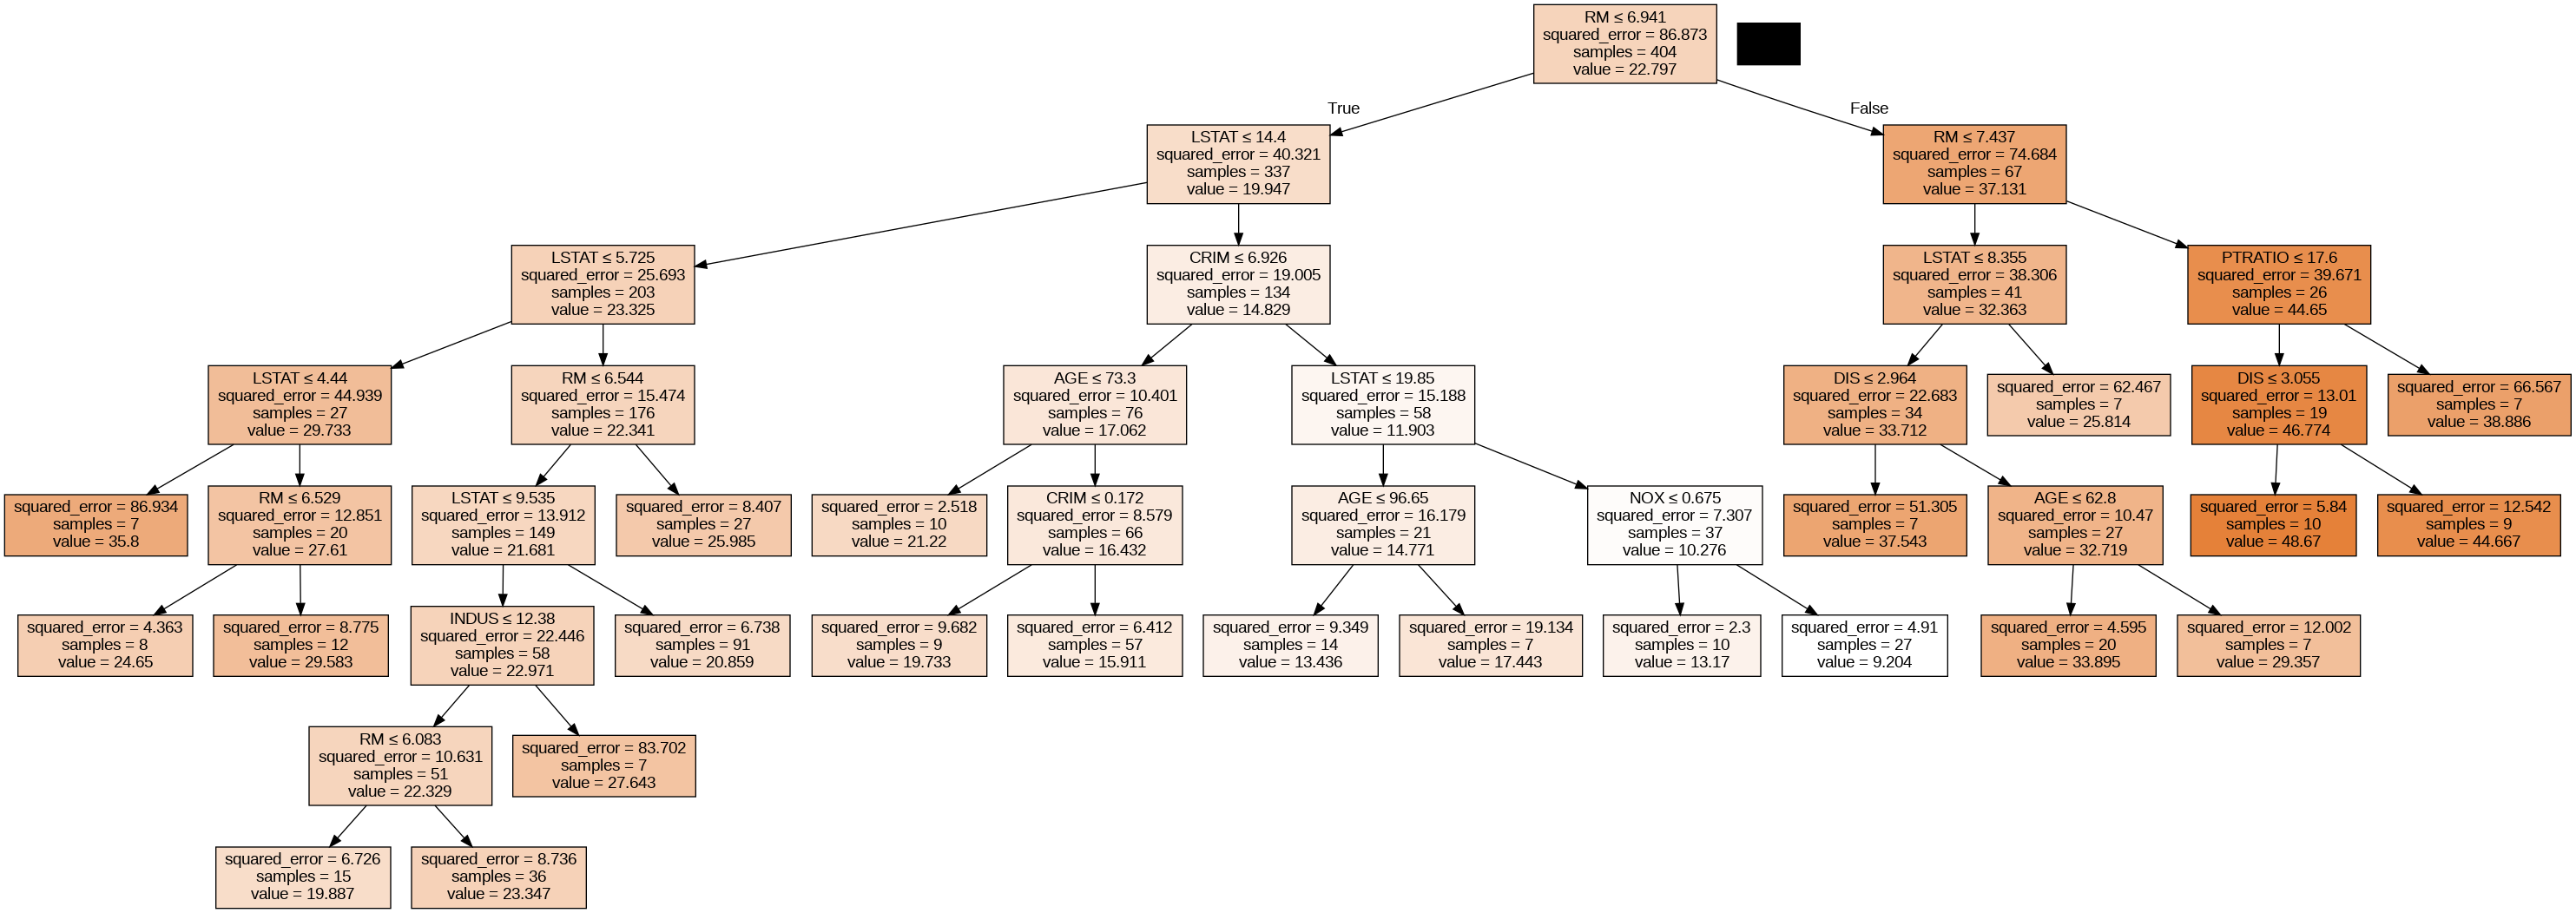

In [18]:
# Visualize the tree using pydotplus
dot_data = tree.export_graphviz(regressor, feature_names= features,out_file='/content/visualizing-the-boston-regression-tree/data/reg_tree.dot',special_characters=True,filled=True )
graph = pydotplus.graphviz.graph_from_dot_file('/content/visualizing-the-boston-regression-tree/data/reg_tree.dot')
Image(graph.create_png())

In [ ]:
# Visualize using dtreeviz
viz = dtreeviz.model(regressor,X_train,y_train,feature_names=features,target_name='peice')
viz.view()

In [32]:
# Use heapq to print features in order of importance
import heapq
importances = regressor.feature_importances_
feature_importance_pair = list(zip(features,importances))
sorted_features = heapq.nlargest(len(feature_importance_pair), feature_importance_pair, key=lambda x: x[1])
for f,i in sorted_features:
  print(f'{f}: {i:.4f}')

RM: 0.6525
LSTAT: 0.2748
CRIM: 0.0330
AGE: 0.0127
PTRATIO: 0.0106
DIS: 0.0068
INDUS: 0.0058
NOX: 0.0038
ZN: 0.0000
CHAS: 0.0000
RAD: 0.0000
TAX: 0.0000
B: 0.0000


<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98729912-57be3e80-237a-11eb-80e4-233ac344b391.png"></img>
</div>